# Prediction of Stock Price Direction

# Assignment
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
We have data for the period from 1997 up to year 2020 that we have split that into training (1997-2016), validation (2016-2018) and testing (2018-2020) periods. The data is available in the AMZN_train.csv, AMZN_val.csv and AMZN_test.csv files, respectively.
<br>
Each dataset has the same format with the following 7 columns:<br>
<br>
Date - in format YYYY-MM-DD<br>
Open - stock price upon opening of an exchange<br>
High - the highest stock price on a given day<br>
Low - the lowest stock price on a given day<br>
Close - stock price at the end of a trading day<br>
Adj Close - adjusted closing price that takes into account corporate actions<br>
Volume - the amount of shares traded over the course of a trading day<br>

## Practicalities
Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.
<br>
Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.
<br>
#### To download the dataset <a href="https://drive.google.com/drive/folders/1KcJHVPDFKjJ4l7DAZGo_8141SieXpCB0?usp=sharing"> Click here </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df_train = pd.read_csv('AMZN_train.csv')
df_test = pd.read_csv('AMZN_test.csv')
df_val = pd.read_csv('AMZN_val.csv')

In [3]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200


### Inserting the classification based column for opening price is greter than the previous then we sell - 1 and if the price is less than the previous close then we buy - 0

In [46]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_val['Date'] = pd.to_datetime(df_val['Date'])

In [101]:
def datetime_preprocessing(df):
    for col in df.select_dtypes(include=['datetime']):
        df['Day'] = df[col].dt.day
        df['Month'] = df[col].dt.month
        df['Year'] = df[col].dt.year
        df.drop(columns=[col], inplace=True)
    return df

### Seprating Day, Month, Year from the dataset

In [110]:
datetime_preprocessing(df_train)
datetime_preprocessing(df_test)
datetime_preprocessing(df_val)

,Open,High,Low,Close,Adj Close,Volume,Buy_indicator,Day,Month,Year
0,710.130005,713.250000,700.280029,710.659973,710.659973,5432900,0,16,5,2016
1,709.900024,714.469971,693.909973,695.270020,695.270020,5121400,0,17,5,2016
2,689.559998,702.539978,688.760010,697.450012,697.450012,4283200,0,18,5,2016
3,691.880005,699.400024,689.559998,698.520020,698.520020,3025600,1,19,5,2016
4,701.049988,707.239990,700.000000,702.799988,702.799988,2916200,1,20,5,2016
...,...,...,...,...,...,...,...,...,...,...
498,1595.000000,1596.880005,1582.510010,1592.390015,1592.390015,3067900,1,8,5,2018
499,1600.000000,1608.000000,1592.000000,1608.000000,1608.000000,3637300,1,9,5,2018
500,1608.479980,1615.599976,1603.439941,1609.079956,1609.079956,2817500,1,10,5,2018
501,1610.989990,1611.099976,1597.890015,1602.910034,1602.910034,2263900,1,11,5,2018


### Creating new column which indicate buy or sell the stock

In [113]:
df_train['Buy_indicator'] = (df_train['Open'].shift(-1) > df_train['Close']).astype(int)
df_test['Buy_indicator'] = (df_test['Open'].shift(-1) > df_test['Close']).astype(int)
df_val['Buy_indicator'] = (df_val['Open'].shift(-1) > df_val['Close']).astype(int)

In [115]:
df_train

,Open,High,Low,Close,Adj Close,Volume,Buy_indicator,Day,Month,Year
0,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1,15,5,1997
1,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1,16,5,1997
2,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1,19,5,1997
3,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,20,5,1997
4,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1,21,5,1997
...,...,...,...,...,...,...,...,...,...,...
4776,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1,9,5,2016
4777,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1,10,5,2016
4778,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1,11,5,2016
4779,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0,12,5,2016


In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           4781 non-null   float64
 1   High           4781 non-null   float64
 2   Low            4781 non-null   float64
 3   Close          4781 non-null   float64
 4   Adj Close      4781 non-null   float64
 5   Volume         4781 non-null   int64  
 6   Buy_indicator  4781 non-null   int32  
 7   Day            4781 non-null   int32  
 8   Month          4781 non-null   int32  
 9   Year           4781 non-null   int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 298.9 KB


In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           504 non-null    float64
 1   High           504 non-null    float64
 2   Low            504 non-null    float64
 3   Close          504 non-null    float64
 4   Adj Close      504 non-null    float64
 5   Volume         504 non-null    int64  
 6   Buy_indicator  504 non-null    int32  
 7   Day            504 non-null    int32  
 8   Month          504 non-null    int32  
 9   Year           504 non-null    int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 31.6 KB


In [121]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           503 non-null    float64
 1   High           503 non-null    float64
 2   Low            503 non-null    float64
 3   Close          503 non-null    float64
 4   Adj Close      503 non-null    float64
 5   Volume         503 non-null    int64  
 6   Buy_indicator  503 non-null    int32  
 7   Day            503 non-null    int32  
 8   Month          503 non-null    int32  
 9   Year           503 non-null    int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 31.6 KB


## Checking any missing values in train, test, valuation of dataset

In [124]:
df_train.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Buy_indicator    0
Day              0
Month            0
Year             0
dtype: int64

In [126]:
df_test.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Buy_indicator    0
Day              0
Month            0
Year             0
dtype: int64

In [128]:
df_val.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Buy_indicator    0
Day              0
Month            0
Year             0
dtype: int64

Their is no missing values found in the dataset we can move further for analysis

## Correlation

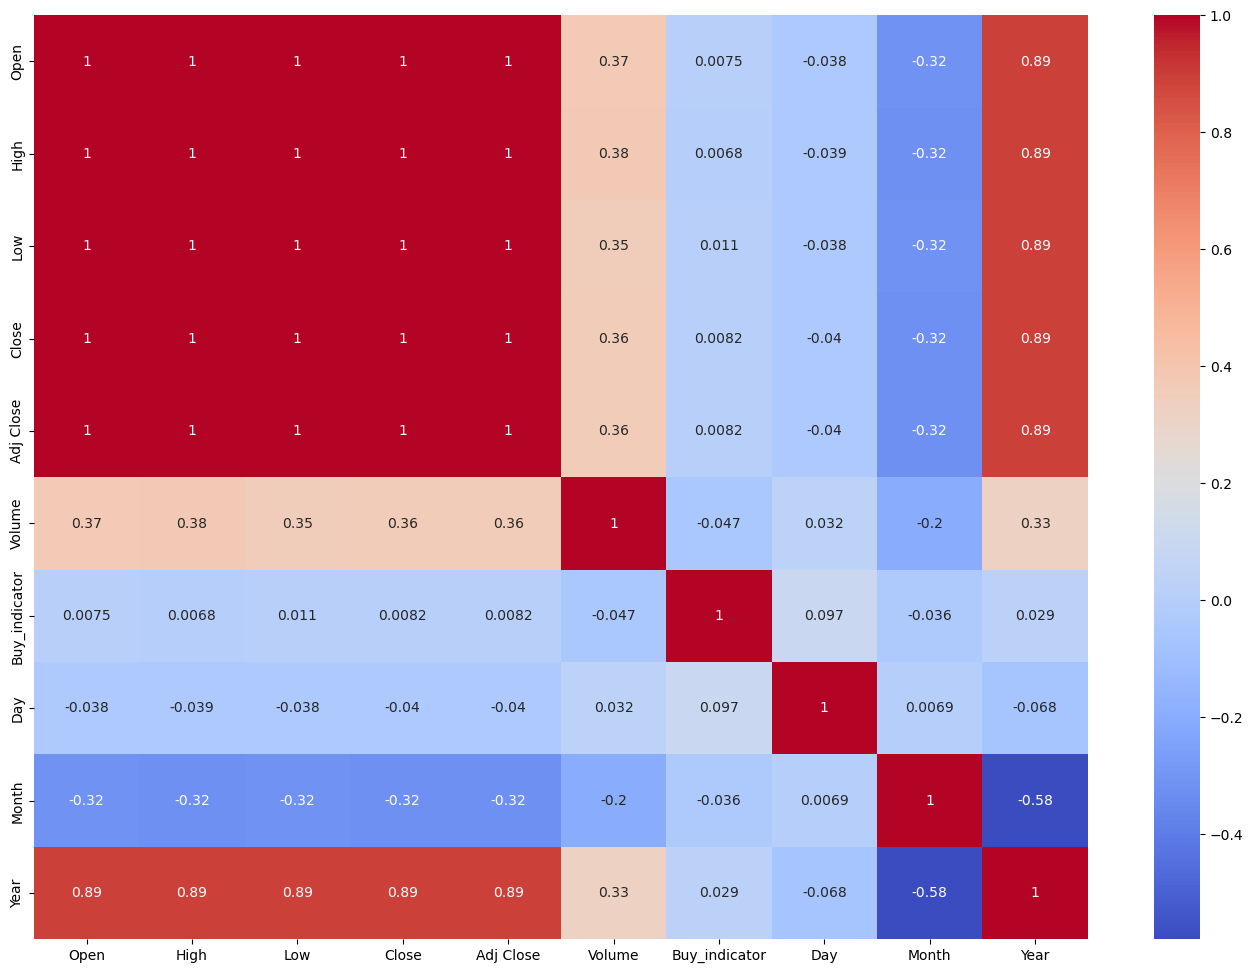

In [164]:
plt.figure(figsize=(17, 12))
sns.heatmap(df_val.corr(), fmt='.2g', cmap='coolwarm', annot=True)
plt.show()

the following three datasets are highly imbalace 

## Dividing dataset for prediction on various ML models.

In [148]:
X_train, y_train = df_train.drop(columns='Buy_indicator'), df_train['Buy_indicator'].astype(int)
X_test, y_test = df_test.drop(columns = 'Buy_indicator'), df_test['Buy_indicator'].astype(int)
X_val, y_val = df_val.drop(columns = 'Buy_indicator'), df_val['Buy_indicator'].astype(int)

In [178]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

models = {
    'logistic regression': LogisticRegression(),
    'SGD' : SGDClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'SVC' : SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_val)
    acc = accuracy_score(y_val, y_predict)
    print(f"{name} Validation Accuracy: {acc:.4f}\n")

# choose best model from all
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

test_acc = accuracy_score(y_test, y_test_pre)
print(f"Final Model Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))

logistic regression Validation Accuracy: 0.6441

SGD Validation Accuracy: 0.6441

Gradient Boosting Validation Accuracy: 0.3519

SVC Validation Accuracy: 0.6302

Final Model Test Accuracy: 0.4266
              precision    recall  f1-score   support

           0       0.42      0.96      0.58       214
           1       0.36      0.02      0.03       290

    accuracy                           0.42       504
   macro avg       0.39      0.49      0.31       504
weighted avg       0.38      0.42      0.27       504



## Conclusion

- logistic regression Validation Accuracy: 0.6441
<br>
- SGD Validation Accuracy: 0.6441
<br>
- SVC Validation Accuracy: 0.6302
<br>
The above model resulting in AUC > 0.515, Which is enough for the Indicator to Buy or Sell Amazon stock. <br>
<br>
<br>
To improve further accuracy of the model:
 - All train, test, valuation dataset are highly imbalace. you can see that with filter method of correlation in datasets and can remove the variable from the dataset to gain accuracy in the model.